In [1]:
import pandas as pd 

In [2]:
import numpy as np
import random
from datetime import datetime

# Número de filas que deseas generar
num_filas = 92

# Definir el rango de fechas
fecha_inicio = pd.to_datetime("2019-01-01")
fecha_fin = pd.to_datetime("2019-12-31")

# Calcular el rango en días entre las fechas
dias_rango = (fecha_fin - fecha_inicio).days

# Generar números aleatorios de días dentro del rango
dias_aleatorios = np.random.randint(0, dias_rango, size=num_filas)

# Sumar los días aleatorios a la fecha de inicio para obtener las fechas finales
fechas_aleatorias = pd.Series(fecha_inicio + pd.to_timedelta(dias_aleatorios, unit='D'))

# Llenado de los datos que seran los aleatorios
breed = pd.Series(["Labrador","Poodle","Chow Chow","Boxer","Chihuahua","St. Bernard","Beagle","Dachshund"]) 
color = pd.Series(["Black","Brown","Gray","Tan","White"])
sex = pd.Series(["F","M"])

# Crear un nuevo DataFrame vacío
dog_pack = pd.DataFrame()

# Rellenar cada columna con valores aleatorios según el tipo de datos
dog_pack["breed"] = [random.choice(breed) for _ in range(num_filas)]
dog_pack["color"] = [random.choice(color) for _ in range(num_filas)]
dog_pack["sex"] = [random.choice(sex) for _ in range(num_filas)]
dog_pack["date"] = pd.to_datetime(fechas_aleatorias).dt.strftime("%B")
dog_pack["height_cm"] = np.round(np.random.uniform(30, 70, size=num_filas),1)
dog_pack["weight_kg"] = np.round(np.random.uniform(1, 70, size=num_filas),1)

dog_pack

,breed,color,sex,date,height_cm,weight_kg
0,Chihuahua,Gray,M,December,30.9,51.6
1,Boxer,White,F,August,49.3,42.1
2,Dachshund,Brown,M,December,30.8,14.2
3,Chow Chow,Gray,M,December,39.6,2.1
4,Beagle,Tan,M,March,34.8,20.7
...,...,...,...,...,...,...
87,St. Bernard,White,F,September,57.3,15.1
88,Chihuahua,White,M,May,34.6,30.1
89,Boxer,Tan,M,May,47.3,12.6
90,St. Bernard,White,M,January,62.0,43.0


Histogramas

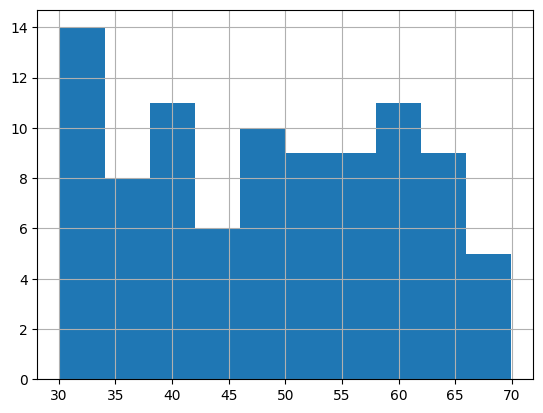

In [3]:
import matplotlib.pyplot as plt
dog_pack["height_cm"].hist() 
plt.show()

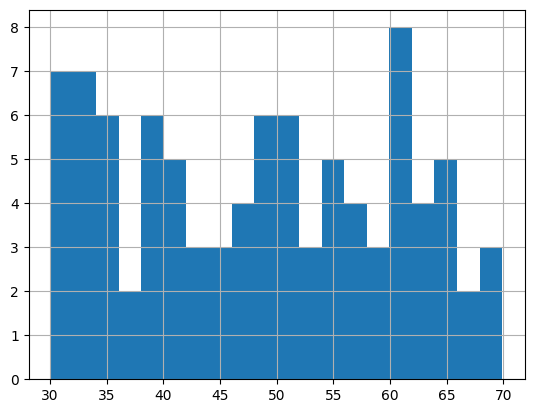

In [4]:
dog_pack["height_cm"].hist(bins=20) 
plt.show()

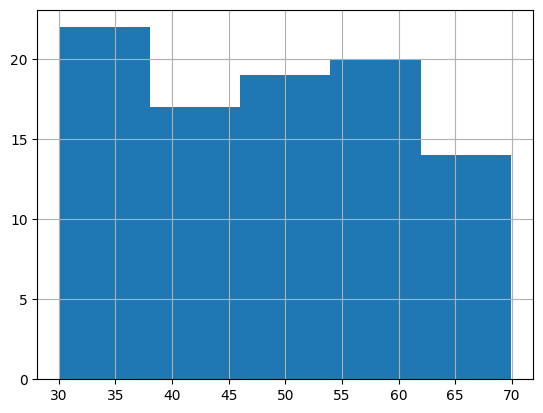

In [5]:
dog_pack["height_cm"].hist(bins=5) 
plt.show()

Diagramas de barras

In [6]:
avg_weight_by_breed = dog_pack.groupby("breed")["weight_kg"].mean() 
print(avg_weight_by_breed) 

breed
Beagle         37.325000
Boxer          37.756250
Chihuahua      37.490000
Chow Chow      39.175000
Dachshund      26.644444
Labrador       39.028571
Poodle         27.411111
St. Bernard    21.300000
Name: weight_kg, dtype: float64


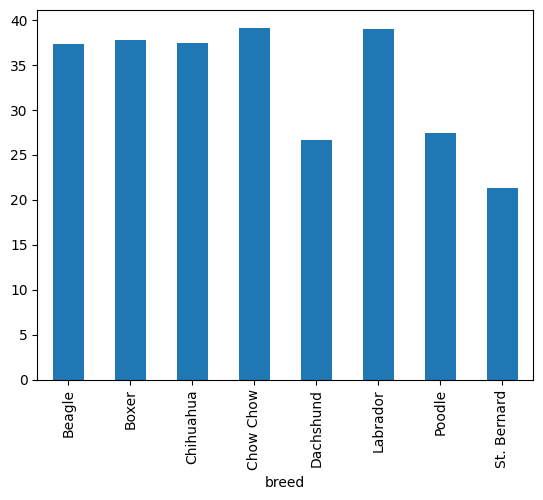

In [7]:
avg_weight_by_breed.plot(kind="bar") 
plt.show() 

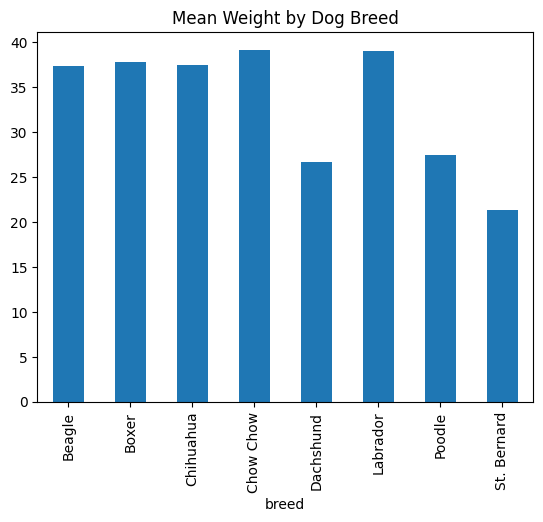

In [8]:
avg_weight_by_breed.plot(kind="bar", 
title="Mean Weight by Dog Breed") 
plt.show()

Diagramas de líneas

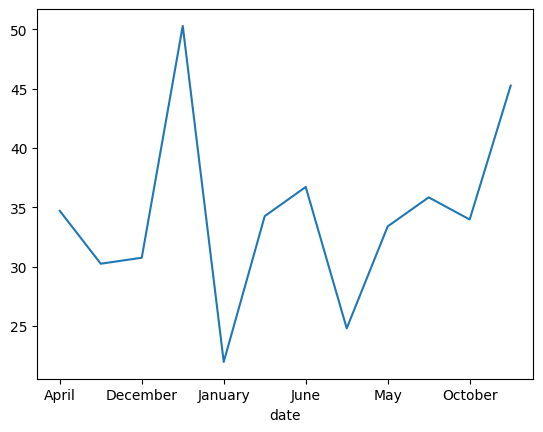

In [15]:
sully=dog_pack.groupby("date")["weight_kg"].mean()
sully.plot(x="date",
              y="weight_kg",
              kind="line") 
plt.show() 

Rotating axis labels

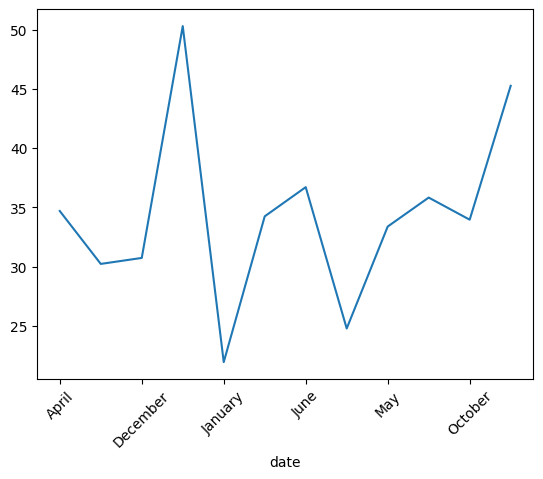

In [16]:
sully.plot(x="date", y="weight_kg", kind="line", rot=45) 
plt.show()

Diagramas de dispersión

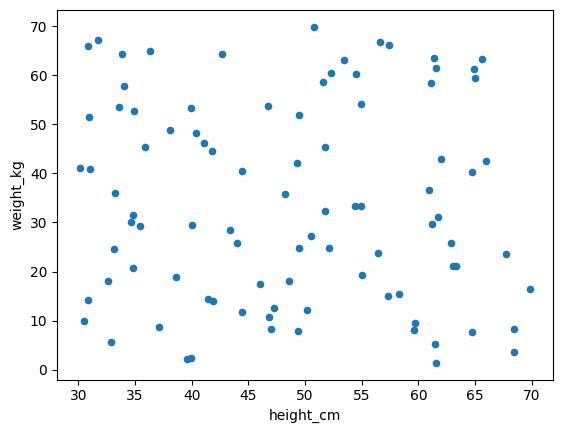

In [11]:
dog_pack.plot(x="height_cm", y="weight_kg", kind="scatter") 
plt.show() 

Layering plots

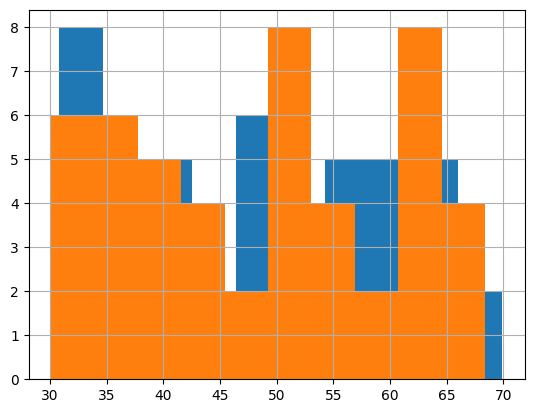

In [12]:
dog_pack[dog_pack["sex"]=="F"]["height_cm"].hist() 
dog_pack[dog_pack["sex"]=="M"]["height_cm"].hist() 
plt.show()

Agregar una leyenda

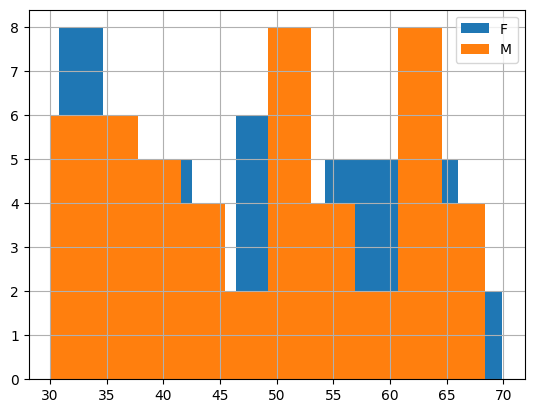

In [13]:
dog_pack[dog_pack["sex"]=="F"]["height_cm"].hist() 
dog_pack[dog_pack["sex"]=="M"]["height_cm"].hist() 
plt.legend(["F", "M"]) 
plt.show() 

Transparencia

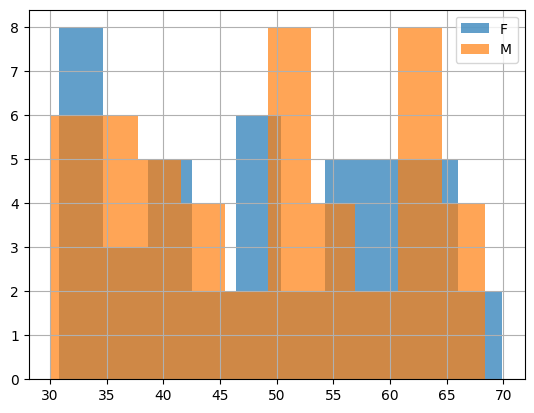

In [14]:
dog_pack[dog_pack["sex"]=="F"]["height_cm"].hist(alpha=0.7) 
dog_pack[dog_pack["sex"]=="M"]["height_cm"].hist(alpha=0.7) 
plt.legend(["F", "M"]) 
plt.show()